In [11]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import itertools
import json

In [5]:


df = pd.read_csv("./data/clean0121.csv", index_col=0)
df.drop(["date"], axis=1, inplace=True)
# find solar,winds  columns
solar_columns = df.filter(like="solar.1")
wind_columns = df.filter(like="wind")

# concat dataframe
df = pd.concat([solar_columns, wind_columns], axis=1)

# MinMax scale by column wise
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
N=8
windNColumns =list(itertools.combinations(wind_columns, N))

# Create a list to store the 10 matrices
matrices = []

for windNColumn in windNColumns[:100]:
    # Pick 4 wind columns and 1 solar column
    selected_columns = list(windNColumn) + [solar_columns.columns[0]]

    # Create a new dataframe with the selected columns for the given index
    df_selected = df_normalized[selected_columns]

    # Calculate the covariance matrix for the selected columns
    selected_cov_matrix = df_selected.cov()

    # Append the covariance matrix to the list
    matrices.append(selected_cov_matrix.values)


    # Convert the list of matrices to a serializable format
    serializable_matrices = [matrix.tolist() for matrix in matrices]

    # Save the matrices to a JSON file
    with open(f'matrices{N+1}by{N+1}.json', 'w') as f:
        json.dump(serializable_matrices, f)


print(matrices)


[array([[ 0.0658492 ,  0.02703027,  0.06400876,  0.05816011,  0.05875773,
         0.05673653,  0.06828587,  0.06084816, -0.02485329],
       [ 0.02703027,  0.04842342,  0.02703007,  0.02002002,  0.02451201,
         0.03483483,  0.01450061,  0.02673911, -0.01502243],
       [ 0.06400876,  0.02703007,  0.06320185,  0.05354004,  0.05535015,
         0.05346257,  0.06397795,  0.05735259, -0.02501211],
       [ 0.05816011,  0.02002002,  0.05354004,  0.06617729,  0.05560143,
         0.05388305,  0.06820864,  0.05856058, -0.02369893],
       [ 0.05875773,  0.02451201,  0.05535015,  0.05560143,  0.05976456,
         0.05223724,  0.05951229,  0.05849714, -0.01384972],
       [ 0.05673653,  0.03483483,  0.05346257,  0.05388305,  0.05223724,
         0.07187688,  0.0515877 ,  0.05623759, -0.03354253],
       [ 0.06828587,  0.01450061,  0.06397795,  0.06820864,  0.05951229,
         0.0515877 ,  0.0960858 ,  0.06616896, -0.02417679],
       [ 0.06084816,  0.02673911,  0.05735259,  0.05856058,  

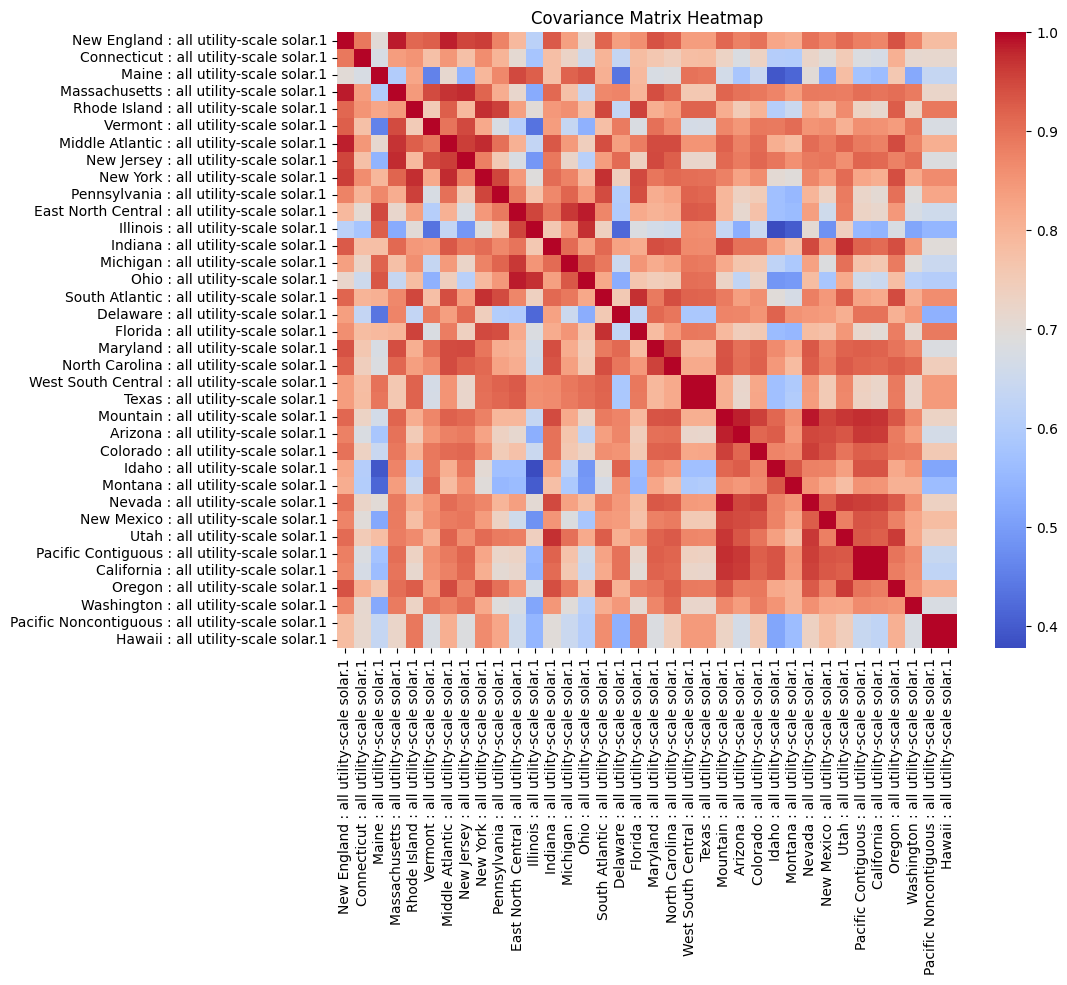

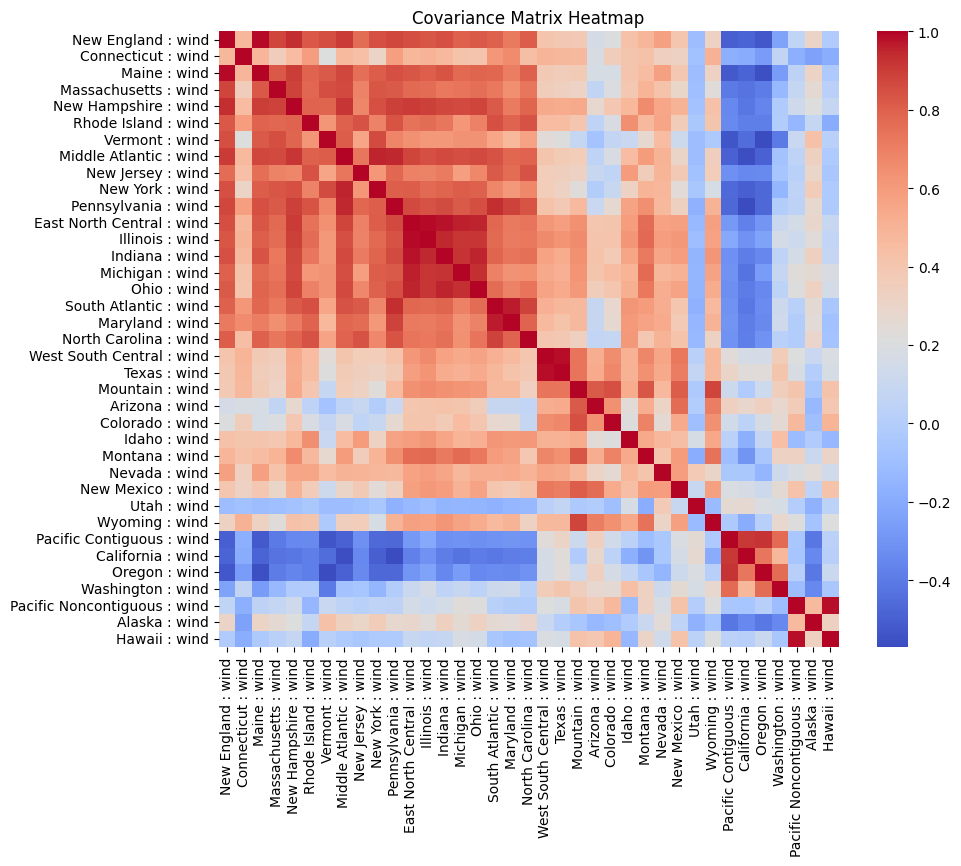

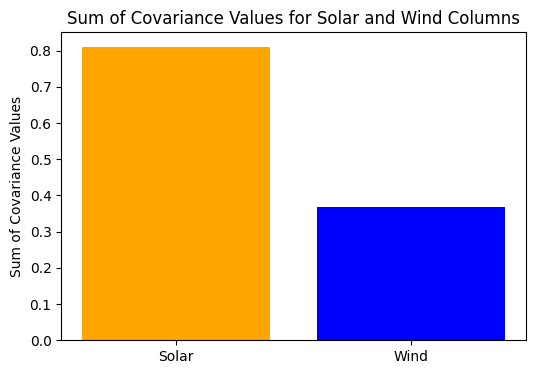

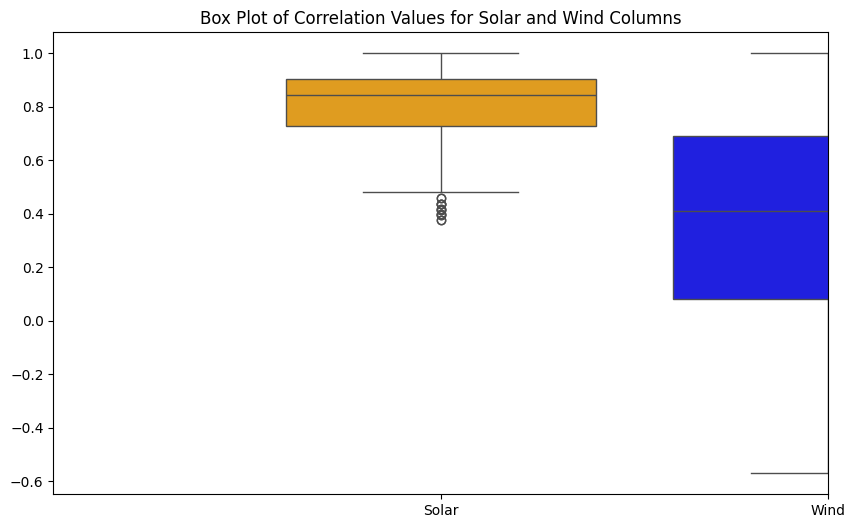

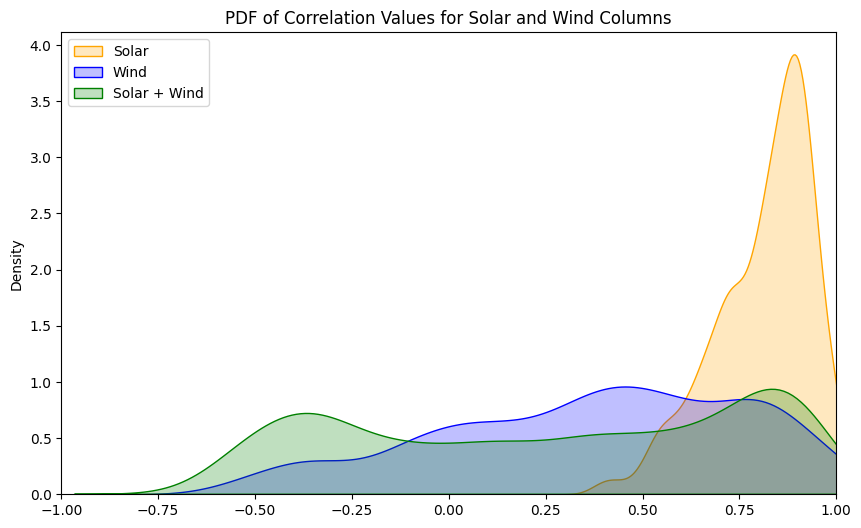

In [30]:
import matplotlib.pyplot as plt

# Calculate the covariance matrix


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(solar_columns.corr(), annot=False, cmap="coolwarm", fmt=".2f")
plt.title('Covariance Matrix Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(wind_columns.corr(), annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

# Calculate the sum of all values in the covariance matrices
solar_cov_sum = solar_columns.corr().values.mean()
wind_cov_sum = wind_columns.corr().values.mean()

# Plot the sums
plt.figure(figsize=(6, 4))
plt.bar(['Solar', 'Wind'], [solar_cov_sum, wind_cov_sum], color=['orange', 'blue'])
plt.ylabel('Sum of Covariance Values')
plt.title('Sum of Covariance Values for Solar and Wind Columns')
plt.show()

# Box plot for the distribution of correlation values
plt.figure(figsize=(10, 6))
sns.boxplot(data=[solar_columns.corr().values.flatten(), wind_columns.corr().values.flatten()], palette=['orange', 'blue'])
plt.xticks([0, 1], ['Solar', 'Wind'])
plt.xlim(-1, 1)
plt.title('Box Plot of Correlation Values for Solar and Wind Columns')
plt.show()

# Plot the PDF of the correlation values for solar and wind columns
# Plot the PDF of the correlation values for solar and wind columns with filled color
plt.figure(figsize=(10, 6))
sns.kdeplot(solar_columns.corr().values.flatten(), color='orange', label='Solar' ,fill =True )
sns.kdeplot(wind_columns.corr().values.flatten(), color='blue', label='Wind',fill=True)
sns.kdeplot(combined_df.corr().values.flatten(), color="green", label="Solar + Wind", fill=True)

plt.xlim(-1, 1)
plt.title('PDF of Correlation Values for Solar and Wind Columns')
plt.legend()
plt.show()